# Group Exercise

In [113]:
import numpy as np
import matplotlib.pyplot as plt

For this group exercises, work with the second initial condition from Monday (involving the $\cos$ function, $10\pi$, etc.). Put your code here:

In [114]:
def init_2u(t0,npts, xl, xr):
    x = np.linspace(xl,xr,npts)
    out = (0.5*(1+np.cos(10*np.pi*(x-t0-0.5))))**4
    for i,j in enumerate(x):
        if x[i] < 0.4:
            out[i] = 0
        if x[i] > 0.6:
            out[i] = 0
        else:
            None
    return x, out

The equation we are solving is: $$\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0$$

So far, we have explored the forward-in-time, upstream scheme applied to this equation, which results in:
$$\frac{u_j^{n+1}-u_j^n}{\Delta t} + c \frac{u_j^n-u_{j-1}^n}{\Delta x} = 0$$

Here, $j$ is the index for an arbitrary grid point in the $x$ direction, and $n$ is an arbitrary index in time.

Because this is an explicit scheme, we can explicitly solve this equation for the value of $u$ at each grid point at the next timestep:
$$u_j^{n+1} = u_j^n - \left(\frac{c\Delta t}{\Delta x}\right)\left(u_j^n-u_{j-1}^n\right)$$

For future reference, note that we can write the general form of the forward-in-time scheme as:
$$\frac{u^{n+1}-u^n}{\Delta t}=f(u^n)$$

Here, $f(u^n)$ represents how the term $-c\frac{\partial u}{\partial x}$ is discretized. This form makes clear that the particulars of the time scheme are independent of the particulars of the spatial discretization scheme. (You can mix and match whichever time scheme you like with whatever spatial scheme you like.)

#### Python function implementing forward-in-time, upstream scheme:

In [115]:
def advect_FTUS(u0, cfl, ntimes=100, npts=101):
    u_new = np.zeros(npts)
    u_t0 = u0.copy()
    
    for k in range(ntimes):
        u_new[1:npts] = u_t0[1:npts] - cfl*(u_t0[1:npts] - u_t0[0:npts-1])
        u_new[0] = u_new[-1]
        u_t0=u_new.copy()
    return u_new

## Error analysis of the forward-in-time, upstream scheme

There are many ways we can quantify how accurate a numerical scheme is. In this exercise, we will use two methods: the maximum absolute error, and the mean absolute error. The code below implements these error measures.

In [116]:
def max_err(solution, exact_solution):
    error = np.abs(solution - exact_solution)
    return np.max(error)

In [117]:
def mean_err(solution, exact_solution):
    error = np.abs(solution - exact_solution)
    return np.mean(error)

Here is a particular grid and timestep setup, which you should use repeatedly later in the assignment:

In [118]:
c = 1
x_left = 0.
x_right = 1.
num_points = 91
dx = (x_right-x_left)/(num_points-1)
dt = .01
cfl = c*dt/dx
print('c, dt, dx, CFL = ', c, dt, dx, cfl)
ntimes = int((x_right-x_left)/(c*dt))
print('ntimes = ', ntimes)

c, dt, dx, CFL =  1 0.01 0.011111111111111112 0.9
ntimes =  100


And the solution after the wave travels all the way around to its starting position...

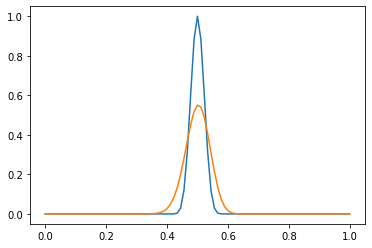

In [119]:
x, ui0 = init_2u(0,num_points, 0, 1)
out = advect_FTUS(ui0, cfl, ntimes, npts=num_points)

plt.plot(x, ui0, x, out)

The error in this case:

In [120]:
err1 = max_err(ui0, out)
err2 = mean_err(ui0, out)
print(f'Max: {err1}   Mean: {err2}')

Max: 0.4499556522038308   Mean: 0.03152093220808693


However let's explore how the error varies as dx and dt vary. For all parts of this assignment, use the settings given below. The number of points in the grid will vary from 11 to 501 as defined in `points_list`, and the timestep will vary from .001 to .05 (inclusive) by .001.

To start with, here is how the CFL's number varies with dx and dt. The plotted values are capped at 1 to emphasize the variations when the CFL number indicates stability.

<ipython-input-121-2e07cb6f1a34>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(dt_array, dx_list, cfl_array)


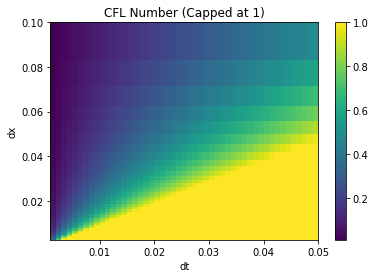

In [121]:
points_list = list(range(11,51,2)) + list(range(51,101,4)) + list(range(101, 402, 10))
dx_list = [(x_right-x_left)/(num_points-1) for num_points in points_list]
dt_array = np.arange(.001, .05001, .001)
cfl_array = np.zeros((len(dx_list), len(dt_array)))

for i, dx in enumerate(dx_list):
    for n, dt in enumerate(dt_array):
        cfl = c*dt/dx
        cfl_array[i,n] = min(cfl,1)

plt.pcolormesh(dt_array, dx_list, cfl_array)
plt.colorbar()
plt.xlabel('dt')
plt.ylabel('dx')
plt.title('CFL Number (Capped at 1)')
plt.show()

Your task is to create similar plots but showing how the maximum error varies with dx and dt, and how the mean absolute error varies with dx and dt. For plotting purposes, cap the max error at 1 and mean error at 0.25 to reveal the finer details when the scheme is stable. (Since the exact solution ranges between 0 and 1, any errors larger than that imply the numerical solution has "blown up".)

c, dt, dx, CFL =  1 0.01 0.011111111111111112 0.9
ntimes =  100


<ipython-input-149-c3a004c4ea67>:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(dt_array, dx_list, err1_array)


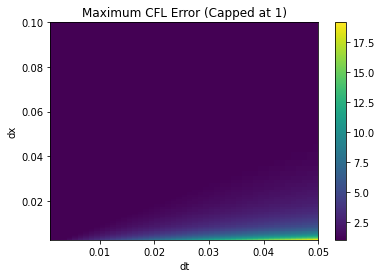

In [149]:
import statistics 


err1_array = np.zeros_like(cfl_array)
err2_array = np.zeros_like(cfl_array)

for i, dx in enumerate(dx_list):
    num_points = points_list[i]
    for n, dt in enumerate(dt_array):
        cfl = c*dt/dx
        err1_array[i,n] = max(cfl,1)
        err2_array[i,n] = min(cfl,0.25)
# Code to compute the FTUS solution for this choice of dx, dt, num_points, etc.
# and then compute (and store) the two error statistics.
c = 1
x_left = 0.
x_right = 1.
num_points = 91
dx = (x_right-x_left)/(num_points-1)
dt = .01
cfl = c*dt/dx
print('c, dt, dx, CFL = ', c, dt, dx, cfl)
ntimes = int((x_right-x_left)/(c*dt))
print('ntimes = ', ntimes)       

# Code to plot the maximum error as a function of dt and dx
plt.pcolormesh(dt_array, dx_list, err1_array)
plt.colorbar()
plt.xlabel('dt')
plt.ylabel('dx')
plt.title('Maximum CFL Error (Capped at 1)')
plt.show()

<ipython-input-150-ba0d61a19be7>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(dt_array, dx_list, err2_array)


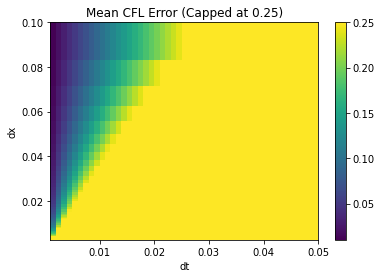

In [150]:
# Code to plot the mean error as a function of dt and dx
plt.pcolormesh(dt_array, dx_list, err2_array)
plt.colorbar()
plt.xlabel('dt')
plt.ylabel('dx')
plt.title('Mean CFL Error (Capped at 0.25)')
plt.show()

Now analyze the following schemes in the same way:
## Leapfrog for time, centered for space

The Leapfrog time scheme is defined as $$\frac{u^{n+1}-u^{n-1}}{2\Delta t} = f(u^n)$$

Note that this scheme requires two time levels ($n-1$ and $n$) to compute time level $n+1$, unlike the forward-in-time scheme. This means the initial condition must be specified at two times, $n=0$ (which corresponds to $t=0$) and $n=1$ (which corresponds to $t=\Delta t$).

The centered in space scheme is similar. At point $j$ and time level $n$, $$-c \frac{\partial u}{\partial x} \approx -c \frac{u_{j+1}^n-u_{j-1}^n}{2 \Delta x}$$

### Python function implementing this scheme:

In [163]:
def leapfrog(alpha,nx=91) :
 
    nt = int(round(nx/abs(alpha)))
    x = np.linspace(-0.5,1,nx)
    t = np.linspace(0,1,nt)
    phi = np.zeros((nt,nx))
    phi[0,:] = np.maximum( -abs(3*x)+1.0, 0 )
    

    phi[1,:] = phi[0,:] - alpha*(phi[0,:]-np.roll(phi[0,:],-1))
    
    for n in range(1,nt-1) :
        phi[n+1,:] = phi[n-1,:] - alpha*(np.roll(phi[n,:],1)-np.roll(phi[n,:],-1))
        if n>0 and n%10 == 0 :
            plt.plot( x, phi[n,:])
    plt.plot( x, phi[-1,:], 'r', linewidth=2)
   

### Plot after one revolution with 91 x points, dt = 0.01

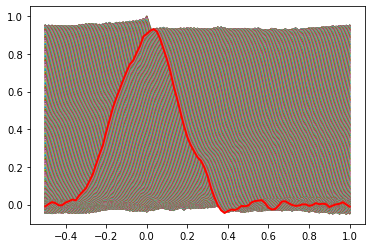

In [164]:
leapfrog(0.01,nx=91)

### Max Error and Mean Error Plots as functions of dt and dx

## Adams-Bashforth for time, upstream for space

The Adams-Bashforth scheme is second order in time, and defined as $$\frac{u^{n+1}-u^{n}}{\Delta t} = f(\frac{3}{2}u^n-\frac{1}{2}u^{n-1})$$

As with the Leapfrog scheme, computing the solution at time level $n+1$ requires the results from the previous two time levels.

### Python function implementing this scheme:

### Plot after one revolution with 91 x points, dt = 0.01

### Max Error and Mean Error Plots as functions of dt and dx

## Matsuno for time, upstream for space

The Matsuno scheme is a *predictor-corrector* scheme, meaning that you first form an intermediate solution (the predictor step, indicated by time level $*$), then improve that solution (the corrector step) to arrive at the actual solution for the next timestep. It is defined as:
$$\frac{u^{*}-u^n}{\Delta t}=f(u^n)$$
followed by
$$\frac{u^{n+1}-u^n}{\Delta t}=f(u^{*})$$
With this scheme, only a single initial condition is required, for $n = 0$ ($t = 0$).

### Python function implementing this scheme:

### Plot after one revolution with 91 x points, dt = 0.01

### Max Error and Mean Error Plots as functions of dt and dx

## Forward-in-time, third-order upwind scheme

The third-order upwind scheme is defined as:
$$-c \frac{\partial u}{\partial x} \approx -c \frac{3u_{j+1}^n+3u_{j}^n-7u_{j-1}^n+u_{j-2}^n}{8 \Delta x}$$

### Python function implementing this scheme:

### Plot after one revolution with 91 x points, dt = 0.01

### Max Error and Mean Error Plots as functions of dt and dx

# Conclusions

Write a paragraph or two describing what you learned going through the exercises.  How do these schemes behave as dx and dt change?  In what ways do the schemes behave differently?